In [32]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### Prob

In [9]:
with open('./dataset/intervention_data/gpt2_train=False_prob.json','rb') as f:
    prob = json.load(f)
len(prob)

4412

In [10]:
prob.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [11]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(prob)

In [12]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(prob.items()):
    df = pd.DataFrame(v, index = neuron, columns=layer)
    df_list.append(df)
    mean_df+=df

    v_arr = np.array(v)
    var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/sample_length
    

In [13]:
mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,-0.005696,0.000242,0.002482,0.007621,-0.000004,0.002089,0.001549,0.000149,0.000712,0.000189,0.000186,-0.000232,0.000040
neuron 1,-0.000639,-0.004594,0.000783,-0.001284,-0.000742,0.000150,0.000313,0.000692,0.001347,0.000359,-0.000027,-0.000250,-0.000738
neuron 2,0.000424,0.007412,0.009317,0.004848,0.000118,0.000696,0.000026,0.000168,0.000297,-0.000210,-0.000074,-0.000696,-0.001231
neuron 3,0.002617,0.000229,0.006637,-0.002974,0.000799,0.000195,0.000548,0.000422,0.000091,-0.000677,0.000230,-0.000479,0.000043
neuron 4,0.003899,0.000699,0.005418,0.001913,0.000843,0.001410,0.000477,-0.000316,0.000603,-0.000119,-0.000050,-0.000873,-0.000087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.001117,0.009290,-0.006910,-0.000664,-0.002502,-0.000702,-0.001189,0.000166,0.000092,0.000152,0.000378,0.000069,-0.000194
neuron 764,-0.002532,-0.001442,-0.001247,0.000353,-0.000176,0.000074,-0.000378,0.000174,-0.000172,0.000350,-0.001107,0.000503,-0.000841
neuron 765,0.007033,0.006013,-0.002832,0.001168,0.001350,0.000152,-0.000082,-0.000839,-0.000668,0.000024,0.000698,-0.000109,-0.000080
neuron 766,0.008924,0.001827,-0.000397,0.000450,0.000175,0.000127,-0.000569,0.000167,0.000181,-0.000532,-0.000305,-0.000381,-0.000393


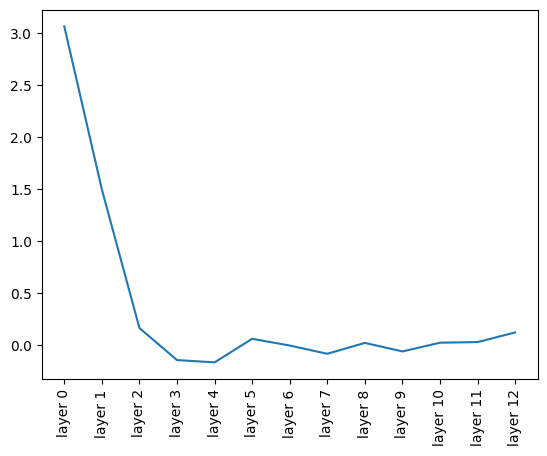

In [35]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

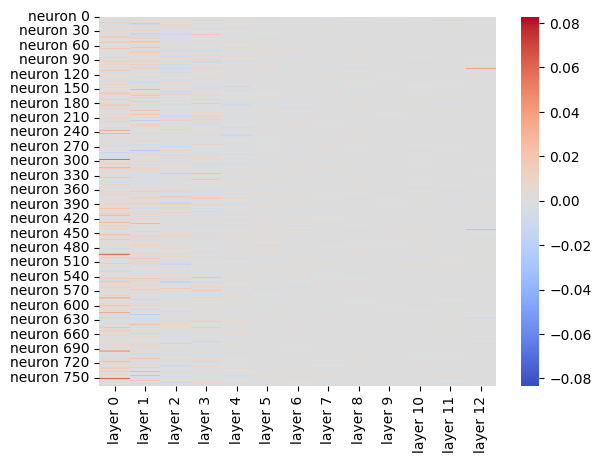

In [15]:
sns.heatmap(mean_df,cmap='coolwarm')

<AxesSubplot: >

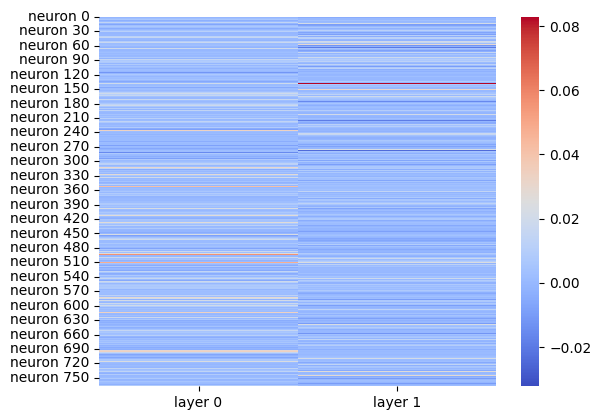

In [16]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

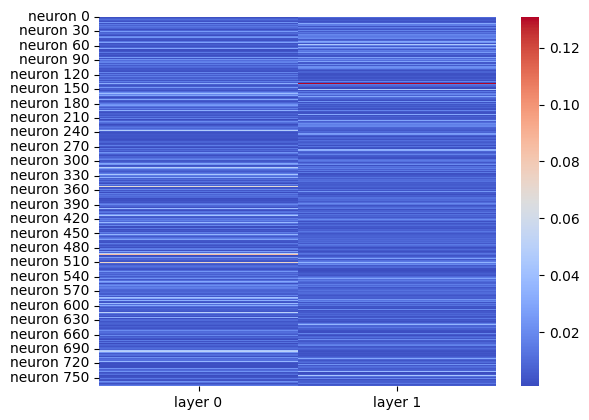

In [17]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm')

## Fine tuning Indirect Effect

### entropy

In [18]:
with open('./dataset/intervention_data/gpt2_train=True_prob.json','rb') as f:
    prob = json.load(f)
len(prob)

4412

In [19]:
prob.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [20]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(prob)

In [21]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(prob.items()):
    df = pd.DataFrame(v, index = neuron, columns=layer)
    fine_df_list.append(df)
    fine_mean_df+=df

    v_arr = np.array(v)
    fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/sample_length
    

In [22]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.000052,0.000152,0.000140,-0.000103,-0.000084,-0.000025,-0.000209,-0.000117,-0.000035,0.000093,0.000015,0.000107,-4.074020e-05
neuron 1,0.000025,-0.000281,-0.000010,-0.000032,0.000049,-0.000020,-0.000028,0.000046,0.000109,-0.000136,-0.000022,-0.000054,-5.186755e-05
neuron 2,-0.000156,0.000394,-0.000024,0.000055,0.000025,0.000106,0.000052,0.000027,0.000182,0.000027,-0.000036,-0.000006,5.519783e-05
neuron 3,-0.000743,-0.000036,0.000066,-0.000118,-0.000027,-0.000052,0.000069,0.000061,-0.000023,0.000047,-0.000011,-0.000095,-5.361854e-07
neuron 4,0.000034,0.000067,-0.000038,-0.000019,0.000256,0.000028,-0.000062,-0.000121,-0.000027,-0.000153,-0.000239,-0.000076,-4.092583e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.000360,0.000291,-0.000050,0.000011,-0.000134,0.000016,-0.000003,-0.000080,-0.000069,-0.000083,-0.000037,0.000049,2.361202e-04
neuron 764,-0.000113,-0.000345,-0.000033,-0.000003,0.000089,-0.000064,0.000026,0.000038,-0.000035,-0.000065,-0.000151,-0.000180,5.171964e-05
neuron 765,0.000269,-0.000049,0.000012,0.000022,0.000179,0.000282,0.000169,0.000307,0.000240,0.000168,-0.000034,0.000453,4.050718e-04
neuron 766,0.002270,0.000164,-0.000071,-0.000011,-0.000079,-0.000029,-0.000001,-0.000008,0.000021,-0.000012,0.000002,-0.000009,-9.354364e-06


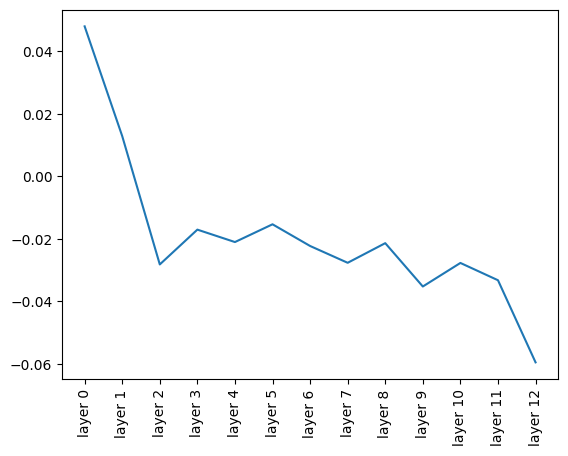

In [36]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

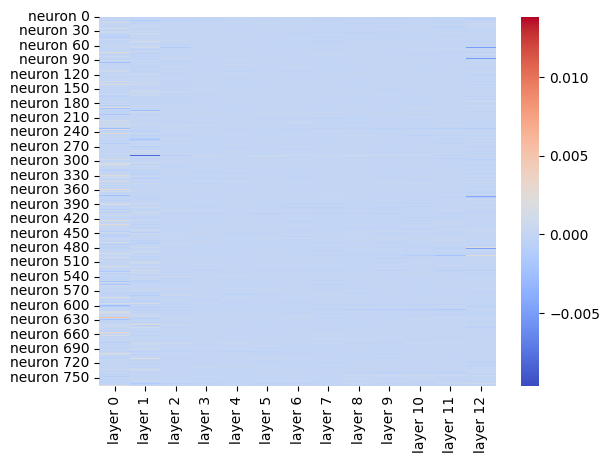

In [24]:
sns.heatmap(fine_mean_df,cmap='coolwarm')

<AxesSubplot: >

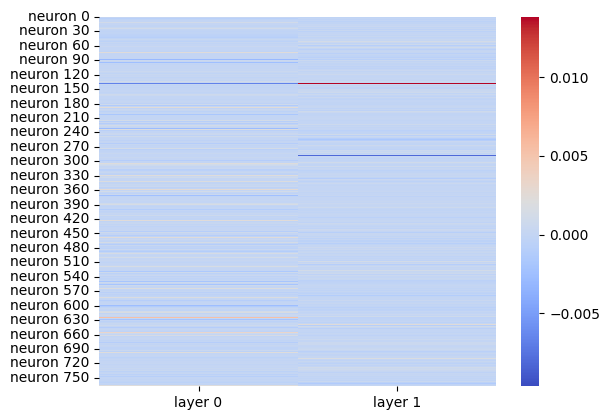

In [25]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

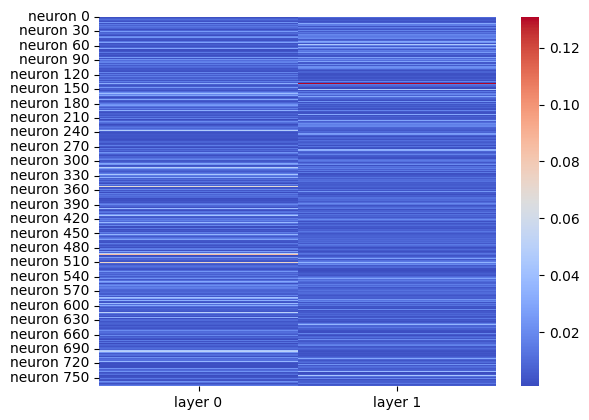

In [26]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm')

### Fine tuning 전,후 비교

In [27]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 752    0.061958
neuron 297    0.058613
neuron 494    0.055981
neuron 510    0.047956
neuron 352    0.041310
neuron 65     0.035831
neuron 572    0.033906
neuron 614    0.033806
neuron 233    0.033797
neuron 695    0.033498
neuron 236    0.033392
neuron 607    0.032972
neuron 661    0.032660
neuron 693    0.031098
neuron 243    0.030572
neuron 345    0.030352
neuron 162    0.030194
neuron 313    0.029522
neuron 264    0.028763
neuron 364    0.028698
Name: layer 0, dtype: float64

neuron 138    0.082889
neuron 372    0.070854
neuron 92     0.066052
neuron 503    0.056708
neuron 151    0.030634
neuron 48     0.029940
neuron 57     0.029221
neuron 745    0.028204
neuron 737    0.026764
neuron 430    0.026052
neuron 393    0.025381
neuron 510    0.023640
neuron 264    0.023478
neuron 441    0.022736
neuron 639    0.022675
neuron 275    0.022355
neuron 195    0.022346
neuron 362    0.022144
neuron 14     0.021205
neuron 710    0.020892
Name: layer 1, dtype: float64

In [28]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 625    0.005339
neuron 264    0.005217
neuron 362    0.004441
neuron 181    0.003634
neuron 656    0.003281
neuron 106    0.003240
neuron 233    0.002877
neuron 243    0.002816
neuron 359    0.002667
neuron 432    0.002552
neuron 185    0.002498
neuron 423    0.002451
neuron 426    0.002434
neuron 262    0.002424
neuron 188    0.002412
neuron 141    0.002360
neuron 458    0.002337
neuron 74     0.002304
neuron 766    0.002270
neuron 572    0.002263
Name: layer 0, dtype: float64

neuron 138    0.013841
neuron 92     0.004059
neuron 570    0.003160
neuron 639    0.002355
neuron 532    0.001983
neuron 526    0.001791
neuron 710    0.001760
neuron 399    0.001636
neuron 264    0.001531
neuron 233    0.001484
neuron 596    0.001292
neuron 441    0.001257
neuron 51     0.001242
neuron 152    0.001172
neuron 527    0.001138
neuron 35     0.001129
neuron 508    0.001128
neuron 102    0.001096
neuron 343    0.001064
neuron 9      0.001053
Name: layer 1, dtype: float64

In [29]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 615   -0.007359
neuron 426   -0.007455
neuron 481   -0.007823
neuron 267   -0.008115
neuron 183   -0.008117
neuron 234   -0.008132
neuron 294   -0.008358
neuron 454   -0.008473
neuron 395   -0.008668
neuron 54    -0.009081
neuron 628   -0.009422
neuron 391   -0.009696
neuron 640   -0.010084
neuron 505   -0.010285
neuron 115   -0.011665
neuron 218   -0.011866
neuron 85    -0.011898
neuron 622   -0.013337
neuron 282   -0.015110
neuron 38    -0.020577
Name: layer 0, dtype: float64

neuron 169   -0.012013
neuron 547   -0.012302
neuron 59    -0.012359
neuron 658   -0.012401
neuron 684   -0.013108
neuron 331   -0.014093
neuron 570   -0.014196
neuron 489   -0.014352
neuron 659   -0.014411
neuron 586   -0.015057
neuron 176   -0.015759
neuron 640   -0.015926
neuron 630   -0.016205
neuron 160   -0.018188
neuron 215   -0.019354
neuron 64    -0.019732
neuron 619   -0.020680
neuron 278   -0.023997
neuron 526   -0.028280
neuron 322   -0.032180
Name: layer 1, dtype: float64

In [30]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 663   -0.001368
neuron 345   -0.001509
neuron 341   -0.001593
neuron 100   -0.001645
neuron 9     -0.001651
neuron 529   -0.001653
neuron 203   -0.001790
neuron 364   -0.001836
neuron 401   -0.001969
neuron 550   -0.001982
neuron 556   -0.002006
neuron 191   -0.002043
neuron 629   -0.002155
neuron 371   -0.002436
neuron 95    -0.002518
neuron 600   -0.002598
neuron 232   -0.002781
neuron 88    -0.002967
neuron 337   -0.003716
neuron 138   -0.006682
Name: layer 0, dtype: float64

neuron 8     -0.000963
neuron 630   -0.000982
neuron 50    -0.000999
neuron 257   -0.001000
neuron 253   -0.001001
neuron 653   -0.001010
neuron 641   -0.001011
neuron 336   -0.001052
neuron 312   -0.001120
neuron 553   -0.001168
neuron 360   -0.001184
neuron 579   -0.001188
neuron 270   -0.001281
neuron 746   -0.001282
neuron 762   -0.001300
neuron 721   -0.001422
neuron 255   -0.001684
neuron 195   -0.002789
neuron 288   -0.008111
neuron 393   -0.009637
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐